In [78]:
import numpy as np

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 2.1

In [133]:
import random
random.seed(1)

max_num_tasks = 2000
num_arms = 10 #n
num_plays = 1000

In [142]:
Q_star = np.random.normal(0, 1, (max_num_tasks, num_arms))

In [143]:
# Exercise 2.1

epsilon = [0, 0.1, 0.01]
all_rewards = np.zeros((len(epsilon), num_plays, max_num_tasks))
is_best_arm = np.zeros((len(epsilon), num_plays, max_num_tasks))
qT = np.zeros((len(epsilon), max_num_tasks, num_arms))
qN = np.zeros((len(epsilon), max_num_tasks, num_arms))
qS = np.zeros((len(epsilon), max_num_tasks, num_arms))

for idx_e in range(len(epsilon)):
    e = epsilon[idx_e]
    print(e)
    for idx_play in range(num_plays):
        for idx_task in range(max_num_tasks):
            best_arm = np.argmax(Q_star[idx_task, :])
            if (np.random.uniform(0, 1) < e):
                arm = np.random.randint(low=0, high=num_arms, size=1)
            else:
                arm = np.argmax(qT[idx_e, idx_task, :], axis=0)
                
            if arm == best_arm:
                is_best_arm[idx_e, idx_play, idx_task] = 1
            
            current_reward = np.random.normal(Q_star[idx_task, arm], 1)
            all_rewards[idx_e, idx_play, idx_task] = current_reward
            qS[idx_e, idx_task, arm] = qS[idx_e, idx_task, arm] + current_reward
            qN[idx_e, idx_task, arm] = qN[idx_e, idx_task, arm] + 1
            qT[idx_e, idx_task, arm] = qS[idx_e, idx_task, arm] / qN[idx_e, idx_task, arm]


0
0.1
0.01


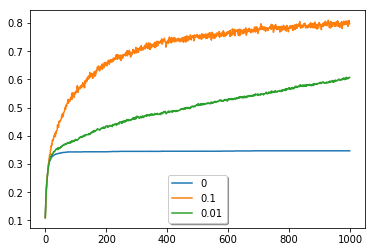

In [144]:
fig, ax = plt.subplots()

for idx_e, e in enumerate(epsilon): 
    ax.plot(np.mean(is_best_arm[idx_e, :, :], axis=1), label=e)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

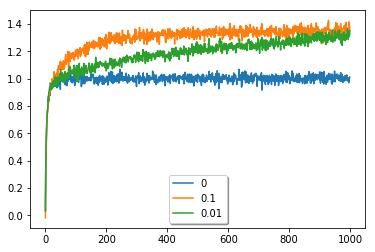

In [145]:
fig, ax = plt.subplots()

for idx_e, e in enumerate(epsilon): 
    ax.plot(range(num_plays), np.mean(all_rewards[idx_e, :, :], axis=1), label=e)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

It looks like when epsilon=0.1 performs best in the long run in terms of the cumulative reward and cumulative probability of selecting the best action. 

## Exercise 2.2

In [147]:
tau = [0.05, 0.1, 0.15]
all_rewards = np.zeros((len(tau), num_plays, max_num_tasks))
is_best_arm = np.zeros((len(tau), num_plays, max_num_tasks))

qT = np.zeros((len(tau), max_num_tasks, num_arms))
qN = np.zeros((len(tau), max_num_tasks, num_arms))
qS = np.zeros((len(tau), max_num_tasks, num_arms))

def softmax_explore(qT, tau):
    exp_qt = np.exp(qT/tau)
    return exp_qt / exp_qt.sum()

for idx_t, t in enumerate(tau):
    print(t)
    for idx_play in range(num_plays):
        for idx_task in range(max_num_tasks):
            best_arm = np.argmax(Q_star[idx_task, :])

            softmax_prob = softmax_explore(qT[idx_t, idx_task, :], t)
            arm = np.random.choice(np.arange(0, num_arms), p=softmax_prob)
                
            if arm == best_arm:
                is_best_arm[idx_t, idx_play, idx_task] = 1
            
            current_reward = np.random.normal(Q_star[idx_task, arm], 1)
            all_rewards[idx_t, idx_play, idx_task] = current_reward
            qS[idx_t, idx_task, arm] = qS[idx_t, idx_task, arm] + current_reward
            qN[idx_t, idx_task, arm] = qN[idx_t, idx_task, arm] + 1
            qT[idx_t, idx_task, arm] = qS[idx_t, idx_task, arm] / qN[idx_t, idx_task, arm]


0.05
0.1
0.15


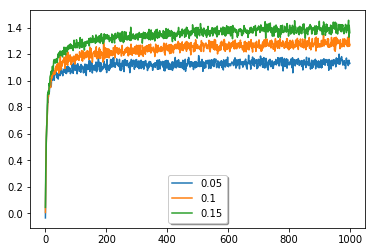

In [148]:
fig, ax = plt.subplots()

for idx_t, t in enumerate(tau): 
    ax.plot(range(num_plays), np.mean(all_rewards[idx_t, :, :], axis=1), label=t)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

(1000,)


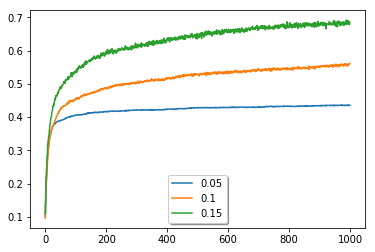

In [149]:
# Percent picked the correct action

fig, ax = plt.subplots()
print(np.mean(is_best_arm[0, :, :], axis=1).shape)
for idx_t, t in enumerate(tau):
    ax.plot(range(num_plays), np.mean(is_best_arm[idx_t, :, :], axis=1), label=t)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

## Exericse 2.5

In [161]:
Q_star = np.random.normal(0, 1, (max_num_tasks+1, num_arms))
all_rewards = np.zeros((num_plays, max_num_tasks))
is_best_arm = np.zeros((num_plays, max_num_tasks))

qT = np.zeros((max_num_tasks, num_arms))
qT_old = np.zeros((max_num_tasks, num_arms))
qN = np.zeros((max_num_tasks, num_arms))
qS = np.zeros((max_num_tasks, num_arms))


for idx_play in range(num_plays):
    for idx_task in range(0, max_num_tasks-1):
        best_arm = np.argmax(Q_star[idx_task, :])
        if (np.random.uniform(0, 1) < 0.1):
            arm = np.random.randint(low=0, high=num_arms, size=1)
        else:
            arm = np.argmax(qT[idx_task, :], axis=0)
        if arm == best_arm:
            is_best_arm[idx_play, idx_task] = 1

        current_reward = np.random.normal(Q_star[idx_task, arm], 1)
        all_rewards[idx_play, idx_task] = current_reward
        qK = qT[idx_task, arm]
        qN[idx_task, arm] = qN[idx_task, arm] + 1
        qT[idx_task, arm] = qK + (1/qN[idx_task, arm]) * (current_reward - qK)
        # Note: the k here is still how many times it was selected, instead of just the idx_tasks

        qS[idx_task, arm] = qS[idx_task, arm] + current_reward
        qT_old[idx_task, arm] = qS[idx_task, arm] / qN[idx_task, arm]


In [162]:
print(qT_old.shape)
np.allclose(qT_old, qT)

(2000, 10)


True

## Non-Stationary Problems